# Forest Classification EDA and feature selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## about data

data includes features for classification of the forests cover type
it is about the study conducted in Roosvelt National Forest

It contains both numerical and categorical features 

These are the seven Cover_Types which needs to be classified <br/>
1 - Spruce/Fir <br/>
2 - Lodgepole Pine <br/>
3 - Ponderosa Pine <br/>
4 - Cottonwood/Willow <br/>
5 - Aspen <br/>
6 - Douglas-fir <br/>
7 - Krummholz

There are following features in the data
Elevation - Elevation in meters <br/>
Aspect - Aspect in degrees azimuth <br/>
Slope - Slope in degrees <br/>
Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features <br/>
Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features <br/>
Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway <br/>
Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice <br/>
Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice <br/>
Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice <br/>
Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points <br/>
Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation <br/>
Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation <br/>
Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation <br/>




In [2]:
data = pd.read_csv("forest.csv")

In [3]:
pd.set_option("display.max_columns",None) #None means show all columns 

In [4]:
data.head(2)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [5]:
data.drop("Id",axis=1,inplace=True)

In [6]:
print("There are {} rows anad {} columns".format(*data.shape))

There are 15120 rows anad 55 columns


First 10 columns are numerical and rest 45 are categorical

categorical data are already onehotencoded

so all the columns are numerical

In [7]:
non_categorical_columns = data.columns[:10]
categorical_columns = data.columns[10:]
categorical_columns_2 = data.columns[10:54] #excluding Cover_Type 


In [8]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## Handling missing values

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 55 columns):
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_Type1                            15120 non-null int64
Soil_T

There seems to be no missing values in the data

## Amount of Variation

In [23]:
data[categorical_columns].nunique()

Wilderness_Area1    2
Wilderness_Area2    2
Wilderness_Area3    2
Wilderness_Area4    2
Soil_Type1          2
Soil_Type2          2
Soil_Type3          2
Soil_Type4          2
Soil_Type5          2
Soil_Type6          2
Soil_Type7          1
Soil_Type8          2
Soil_Type9          2
Soil_Type10         2
Soil_Type11         2
Soil_Type12         2
Soil_Type13         2
Soil_Type14         2
Soil_Type15         1
Soil_Type16         2
Soil_Type17         2
Soil_Type18         2
Soil_Type19         2
Soil_Type20         2
Soil_Type21         2
Soil_Type22         2
Soil_Type23         2
Soil_Type24         2
Soil_Type25         2
Soil_Type26         2
Soil_Type27         2
Soil_Type28         2
Soil_Type29         2
Soil_Type30         2
Soil_Type31         2
Soil_Type32         2
Soil_Type33         2
Soil_Type34         2
Soil_Type35         2
Soil_Type36         2
Soil_Type37         2
Soil_Type38         2
Soil_Type39         2
Soil_Type40         2
Cover_Type          7
dtype: int

columns Soil_Type15 and Soil_Type7 have zero variation so we can remove those columns from data

In [10]:
for i in categorical_columns:
    a = data[i].value_counts()
    print("{} -- {}".format(i,a.values))

Wilderness_Area1 -- [11523  3597]
Wilderness_Area2 -- [14621   499]
Wilderness_Area3 -- [8771 6349]
Wilderness_Area4 -- [10445  4675]
Soil_Type1 -- [14765   355]
Soil_Type2 -- [14497   623]
Soil_Type3 -- [14158   962]
Soil_Type4 -- [14277   843]
Soil_Type5 -- [14955   165]
Soil_Type6 -- [14470   650]
Soil_Type7 -- [15120]
Soil_Type8 -- [15119     1]
Soil_Type9 -- [15110    10]
Soil_Type10 -- [12978  2142]
Soil_Type11 -- [14714   406]
Soil_Type12 -- [14893   227]
Soil_Type13 -- [14644   476]
Soil_Type14 -- [14951   169]
Soil_Type15 -- [15120]
Soil_Type16 -- [15006   114]
Soil_Type17 -- [14508   612]
Soil_Type18 -- [15060    60]
Soil_Type19 -- [15074    46]
Soil_Type20 -- [14981   139]
Soil_Type21 -- [15104    16]
Soil_Type22 -- [14775   345]
Soil_Type23 -- [14363   757]
Soil_Type24 -- [14863   257]
Soil_Type25 -- [15119     1]
Soil_Type26 -- [15066    54]
Soil_Type27 -- [15105    15]
Soil_Type28 -- [15111     9]
Soil_Type29 -- [13829  1291]
Soil_Type30 -- [14395   725]
Soil_Type31 -- [1


columns Soil_Type 8,9,21,25,27,28,34,18,19,26,37 have very less variation so we can drop these columns <br/>
and perform forward_selection to see if we need any of these

In [11]:
X_train[y_train.isin([1])][non_categorical_columns].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000
mean,3128.235805,158.244496,13.111240,271.271147,41.413673,2575.603708,211.939745,223.222480,143.760718,1964.790846
std,155.231838,116.536075,6.860458,221.524671,56.139602,1497.075941,25.381492,18.069408,36.190672,1232.226716
min,2525.000000,0.000000,1.000000,0.000000,-97.000000,108.000000,86.000000,125.000000,0.000000,30.000000
25%,3039.000000,54.000000,8.000000,90.000000,4.000000,1384.250000,199.000000,214.000000,122.000000,1050.750000
50%,3142.000000,123.000000,12.000000,218.000000,24.000000,2372.000000,217.000000,226.000000,144.000000,1771.000000
75%,3234.000000,282.000000,17.000000,395.000000,61.000000,3585.000000,230.000000,236.000000,169.000000,2608.500000
max,3675.000000,359.000000,41.000000,1129.000000,411.000000,6414.000000,254.000000,254.000000,246.000000,6853.000000


In [12]:
X_train[y_train.isin([2])][non_categorical_columns].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,2922.063446,149.945867,13.359721,288.625146,46.590803,2393.442957,214.213038,225.442375,142.866123,2141.845751
std,185.144789,107.179664,7.037949,217.713509,58.044574,1604.873472,24.594795,18.246034,35.052463,1395.709499
min,2169.000000,0.000000,0.000000,0.000000,-146.000000,60.000000,83.000000,115.000000,19.000000,42.000000
25%,2804.000000,59.000000,8.000000,124.000000,8.000000,1104.750000,202.000000,215.000000,120.000000,1167.000000
50%,2931.000000,124.000000,13.000000,242.000000,30.500000,1982.000000,220.000000,227.000000,142.000000,1848.000000
75%,3040.500000,236.000000,17.000000,408.000000,68.750000,3342.000000,232.000000,239.000000,166.000000,2622.500000
max,3413.000000,359.000000,45.000000,1343.000000,554.000000,6811.000000,254.000000,254.000000,247.000000,6723.000000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


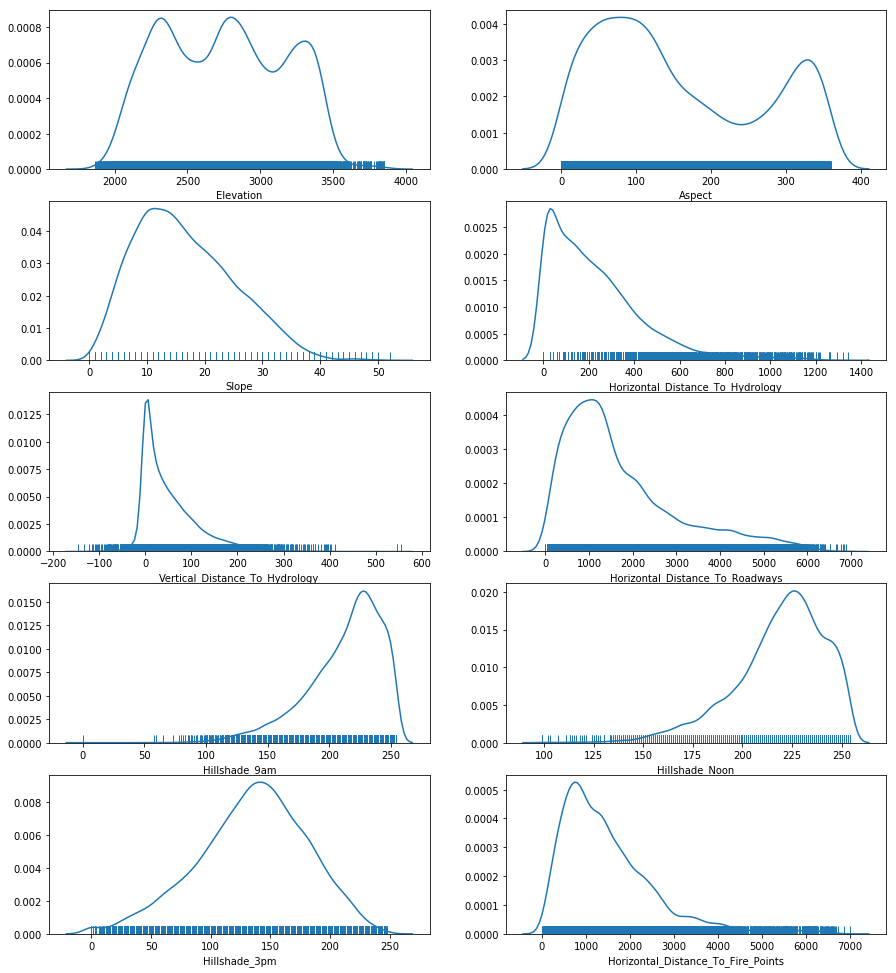

In [13]:
plt.figure(figsize=(15,17))
for i,j in enumerate(non_categorical_columns):
    plt.subplot(5,2,i+1)
    sns.distplot(data[j],hist=False,rug=True)

# Analysis Based on Cover Types

In [9]:
df = data.copy()

In [10]:
def name_cover_type(row):
    cover_dict = {
        1 :'Spruce/Fir',
      2 : 'Lodgepole Pine',
      3 : 'Ponderosa Pine',
      4 : 'Cottonwood/Willow',
     5 : 'Aspen',
     6 :'Douglas-fir',
     7 :'Krummholz'
    }
    return cover_dict[row.Cover_Type]
    
        

In [11]:
df['Cover_Type'] = df.apply(name_cover_type,axis=1)

In [12]:
cover_dict = {
        1 :'Spruce/Fir',
      2 : 'Lodgepole Pine',
      3 : 'Ponderosa Pine',
      4 : 'Cottonwood/Willow',
     5 : 'Aspen',
     6 :'Douglas-fir',
     7 :'Krummholz'
    }


In [13]:
df.head(2)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Aspen


## Elevation based on cover type

Elevation specifies at what height cover_type is situated 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


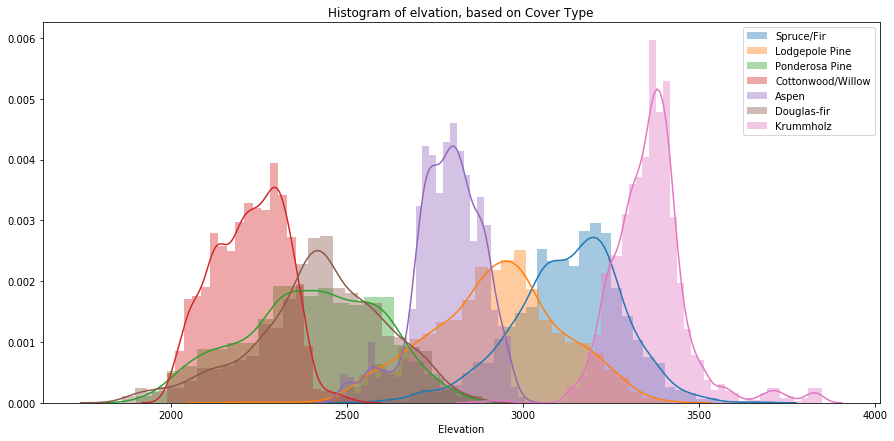

In [14]:
def make_distplot(column):
    plt.figure(figsize=(15,7))
    for i in range(7):
        sns.distplot(df[df.Cover_Type == cover_dict[i+1]][column],label=cover_dict[i+1])
        plt.legend()
make_distplot("Elevation")
plt.title("Histogram of elvation, based on Cover Type")
plt.show()

**Analysis of elevation** <br/>

**Cotton wood/willow**           : tend to have low value of elevation between 2000 to 2800 <br/>
**Krummholz**                    : tend to have very high elevation between 3000 to 4000 <br/>
**Ponderasa Pine** and **Aspen** :  have elevation between 1800 to 3000 <br/>
**Douglas Fir**                  : have elevation between 2500 to 3000 but most of them are in middle range small std deviation. <br/>
**Lodgepole** and **Spruce Fir** : have almost same range of 2500 to 3500 but have different mean.


In [161]:
data_12 = df[y.isin([1,2])].copy()


In [162]:
data_1 = df[y.isin([1])].copy()
data_2 = df[y.isin([2])].copy()

In [154]:
data_1.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,SoilType
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.0,2160.0,2160.0,2160.0,2160.000000,2160.0,2160.0,2160.0,2160.0,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.0,2160.0,2160.000000,2160.000000,2160.0,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.0,2160.000000,2160.000000,2160.0,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.0,2160.000000,2160.0,2160.0,2160.000000,2160.000000,2160.000000,2111.000000
mean,3128.025926,159.463426,13.112963,271.507407,41.281481,2579.715741,211.690278,223.248611,144.065741,1994.412963,0.491667,0.083796,0.424537,0.0,0.0,0.0,0.0,0.002315,0.0,0.0,0.0,0.0,0.000463,0.004167,0.002315,0.011111,0.007870,0.0,0.0,0.004167,0.000926,0.0,0.006944,0.018981,0.005556,0.127315,0.174074,0.059259,0.0,0.003241,0.003241,0.0,0.188426,0.037500,0.052778,0.106481,0.085185,0.0,0.001389,0.0,0.0,0.037037,0.036574,0.022685,27.372809
std,156.124988,117.280496,6.817153,221.250993,55.740461,1495.176212,25.399338,17.975428,36.114843,1249.350813,0.500046,0.277146,0.494387,0.0,0.0,0.0,0.0,0.048068,0.0,0.0,0.0,0.0,0.021517,0.064430,0.048068,0.104846,0.088386,0.0,0.0,0.064430,0.030422,0.0,0.083063,0.136491,0.074345,0.333402,0.379261,0.236164,0.0,0.056848,0.056848,0.0,0.391142,0.190028,0.223641,0.308524,0.279222,0.0,0.037251,0.0,0.0,0.188896,0.187757,0.148932,5.834673
min,2525.000000,0.000000,1.000000,0.000000,-97.000000,108.000000,86.000000,125.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,4.000000
25%,3036.000000,54.000000,8.000000,90.000000,4.000000,1380.000000,199.000000,214.000000,122.000000,1080.250000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,23.000000
50%,3144.000000,123.000000,12.000000,218.000000,23.000000,2377.000000,216.000000,226.000000,144.000000,1817.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,29.000000
75%,3234.000000,286.000000,17.000000,395.000000,61.000000,3601.250000,230.000000,236.000000,169.000000,2642.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,32.000000
max,3675.000000,359.000000,41.000000,1129.

In [155]:
data_2.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,SoilType
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.00000,2160.000000,2160.000000,2160.000000,2160.0,2160.000000,2160.000000,2160.000000,2160.0,2160.000000,2160.0,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.0,2160.0,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.0,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.0,2160.000000,2160.000000,2160.000000,2157.000000
mean,2922.540278,151.097222,13.423611,287.728704,47.337963,2425.791667,214.044444,225.369907,142.950926,2155.277315,0.52500,0.030556,0.435185,0.009259,0.0,0.001389,0.005556,0.009259,0.0,0.003241,0.0,0.000463,0.004167,0.037500,0.031019,0.093981,0.038889,0.0,0.0,0.006481,0.003241,0.007407,0.006019,0.025463,0.0,0.025000,0.068981,0.033333,0.000463,0.008796,0.002315,0.002778,0.256481,0.066667,0.044907,0.118056,0.085185,0.005556,0.000463,0.000926,0.0,0.003241,0.001389,0.001389,24.568382
std,185.778268,107.320930,7.038483,215.373206,59.137843,1629.381089,25.033870,18.216843,35.187638,1407.321563,0.49949,0.172150,0.495896,0.095801,0.0,0.037251,0.074345,0.095801,0.0,0.056848,0.0,0.021517,0.064430,0.190028,0.173408,0.291871,0.193375,0.0,0.0,0.080265,0.056848,0.085767,0.077363,0.157563,0.0,0.156161,0.253481,0.179547,0.021517,0.093397,0.048068,0.052644,0.436792,0.249502,0.207149,0.322749,0.279222,0.074345,0.021517,0.030422,0.0,0.056848,0.037251,0.037251,8.270170
min,2169.000000,0.000000,0.000000,0.000000,-146.000000,30.000000,83.000000,115.000000,6.000000,42.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000
25%,2802.000000,60.000000,8.000000,124.000000,9.000000,1110.000000,202.000000,215.000000,120.000000,1167.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,20.000000
50%,2931.500000,125.000000,13.000000,242.000000,31.000000,2023.500000,220.000000,227.000000,141.000000,1851.000000,1.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,29.000000
75%,3042.000000,238.000000,17.000000,404.000000,68.000000,3413.750000,232.000000,239.000000,166.000000,2642.000000,1.00000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.

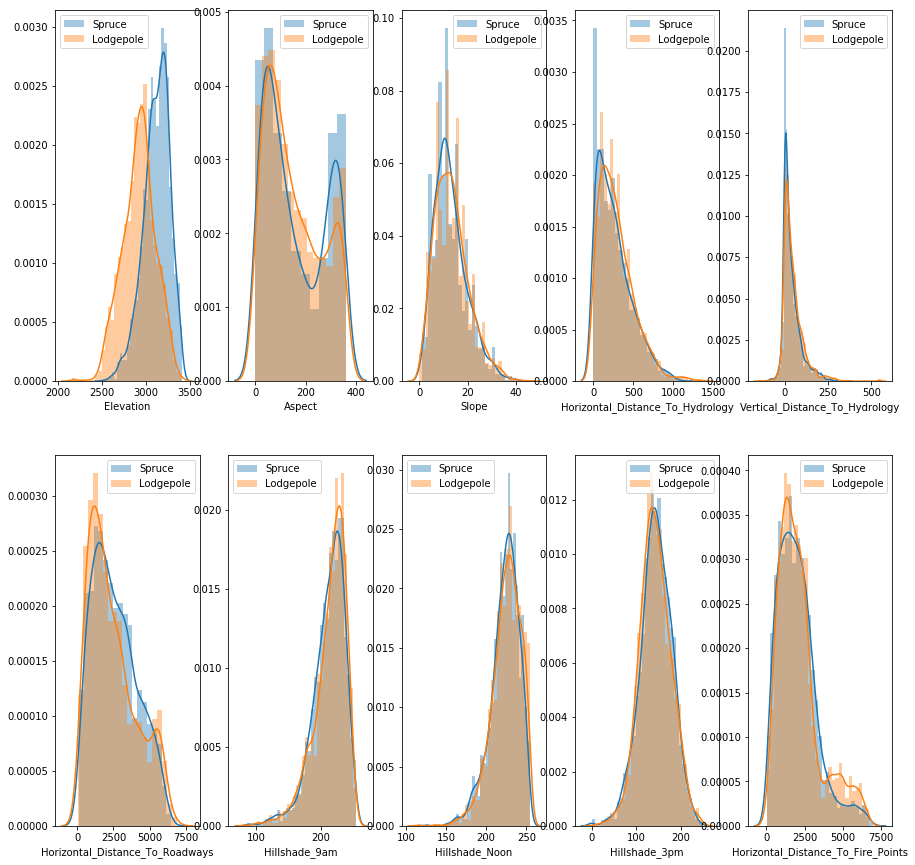

In [157]:
def distplot_of_12(column):
    sns.distplot(data_12[(data_12.Cover_Type == cover_dict[1]) & (data_12['Elevation']>=2169) & (data_12['Elevation']<=3413)][column],label='Spruce')
    sns.distplot(data_12[(data_12.Cover_Type == cover_dict[2]) & (data_12['Elevation']>=2169) & (data_12['Elevation']<=3413)][column],label='Lodgepole')
    plt.legend()
plt.figure(figsize=(15,15))
for i in range(1,11):
    plt.subplot(2,5,i)
    distplot_of_12(X_train.columns[i-1])
    
# distplot_of_12("Elevation")

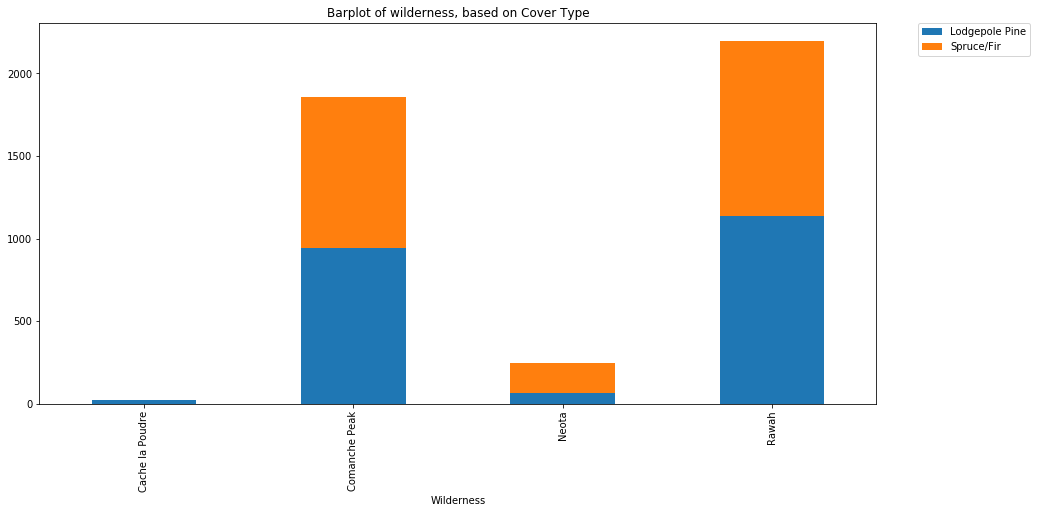

In [158]:
df_plot_12 = data_12.groupby(['Cover_Type', 'Wilderness']).size().reset_index().pivot(columns='Cover_Type', index='Wilderness', values=0)
df_plot_12.plot(kind='bar', stacked=True,figsize=(15,7))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Barplot of wilderness, based on Cover Type")
plt.show()

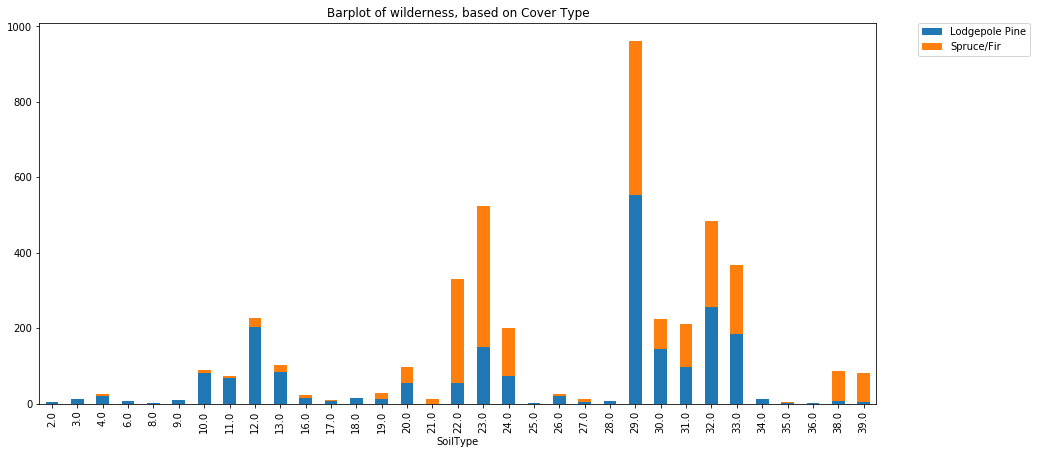

In [163]:
df_plot_12 = data_12.groupby(['Cover_Type', 'SoilType']).size().reset_index().pivot(columns='Cover_Type', index='SoilType', values=0)
df_plot_12.plot(kind='bar', stacked=True,figsize=(15,7))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Barplot of wilderness, based on Cover Type")
plt.show()

In [166]:
df_plot_12

Cover_Type,Lodgepole Pine,Spruce/Fir
SoilType,,
2.0,3.0,NaN
3.0,12.0,NaN
4.0,20.0,5.0
6.0,7.0,NaN
8.0,1.0,NaN
9.0,9.0,1.0
10.0,81.0,9.0
11.0,67.0,5.0
12.0,203.0,24.0


## Aspect based on cover Type

Aspect shows at what angle it the Cover_Type from reference to direction

0 means (north) , 180 means (south), 360 means north again 

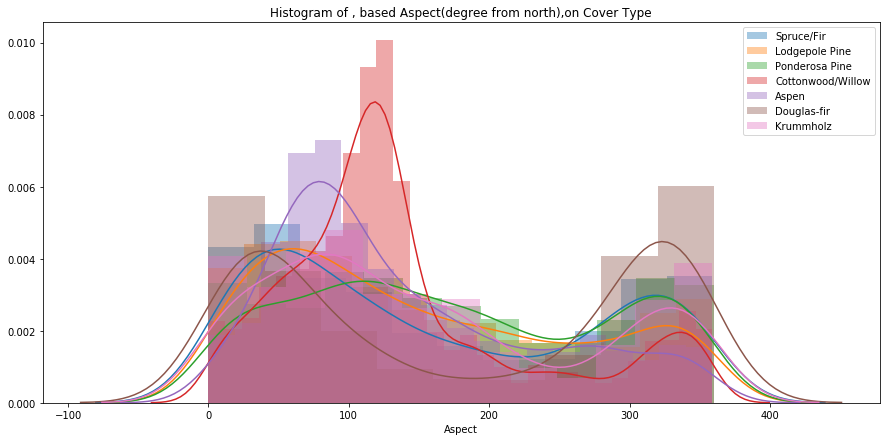

In [54]:
make_distplot("Aspect")
plt.title("Histogram of , based Aspect(degree from north),on Cover Type")
plt.show()

**Anslysis based on aspect**

**Cotton wood/willow**           : peak at 120. <br/>
**Krummholz**                    : peak at 120 but high standard deviation than Krummholz. <br/>
**Ponderasa Pine**  : have a balanced distribution but low at around 250. <br/>
 **Aspen**          : peak at 80 <br/>
**Douglas Fir**                  : . <br/>
**Lodgepole** and **Spruce Fir** : have almost same range type of distribution.


here we can add a new column that shows direction like N,NE,E,SE,S,SW,W,NW <br/>
because value of the degree can be missleading in terms that it does not matter how high or  <br/>
low the value is but where is the Cover_Type situated

## Grouping Aspect


In [15]:
def group_aspect(row):
    row_aspect = row['Aspect']
    if row_aspect >= 0 and row_aspect < 30:
        return 'N'
    if row_aspect >= 30 and row_aspect < 60:
        return 'NE'
    if row_aspect >= 60 and row_aspect < 120:
        return 'E'
    if row_aspect >= 120 and row_aspect < 150:
        return 'SE'
    if row_aspect >= 150 and row_aspect < 210:
        return 'S'
    if row_aspect >= 210 and row_aspect < 240:
        return 'SW'
    if row_aspect >= 240 and row_aspect < 300:
        return 'W'
    if row_aspect >= 300 and row_aspect < 330:
        return 'NW'
    if row_aspect >= 330 and row_aspect <=360:
        return 'N'
    
    

In [16]:
df['direction'] = df.apply(group_aspect,axis=1)

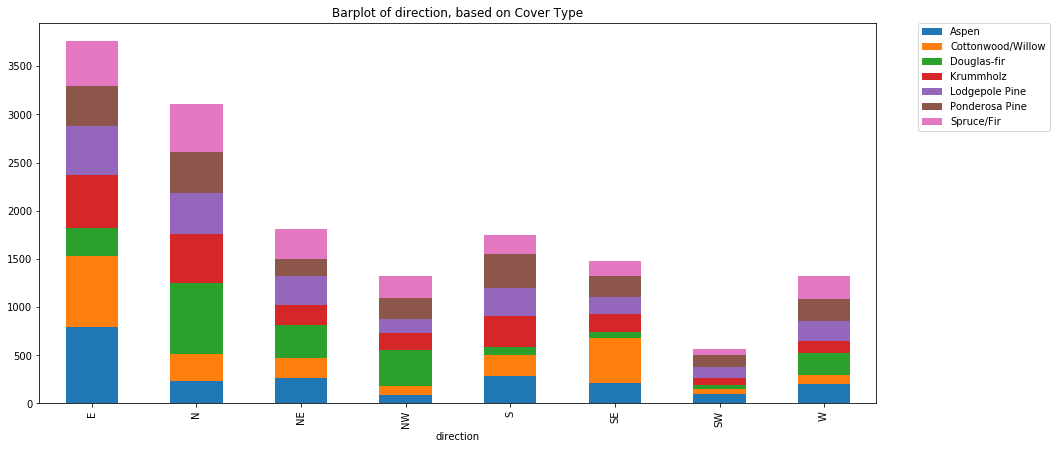

In [56]:
# plt.figure(figsize=(15,7))
df_plot = df.groupby(['Cover_Type', 'direction']).size().reset_index().pivot(columns='Cover_Type', index='direction', values=0)
df_plot.plot(kind='bar', stacked=True,figsize=(15,7))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Barplot of direction, based on Cover Type")
plt.show()

## slope based on cover Type

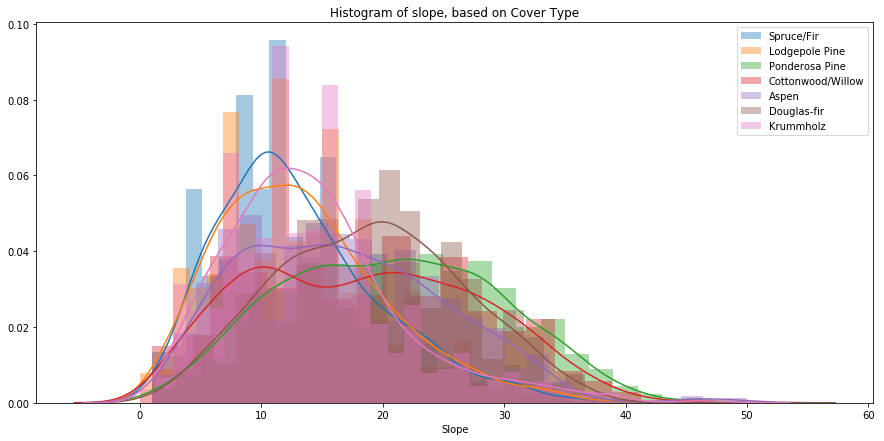

In [57]:
make_distplot("Slope")
plt.title("Histogram of slope, based on Cover Type")
plt.show()

In [59]:
df.head(2)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,direction
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Aspen,NE
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Aspen,NE


## Horizontal distance to Hydrology

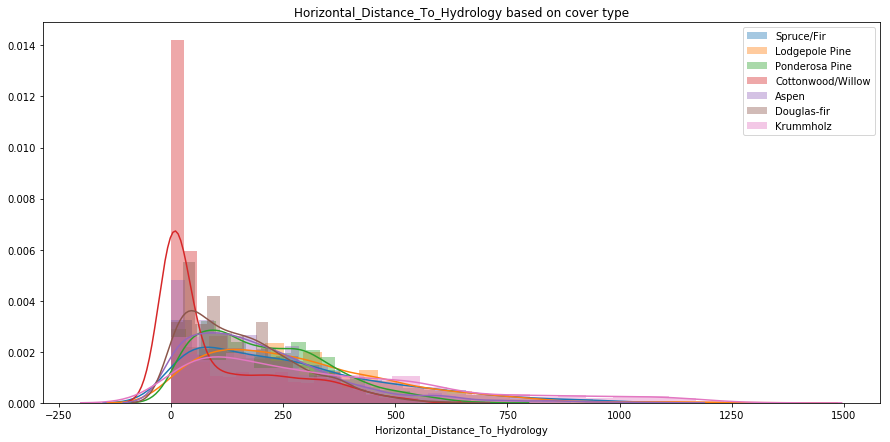

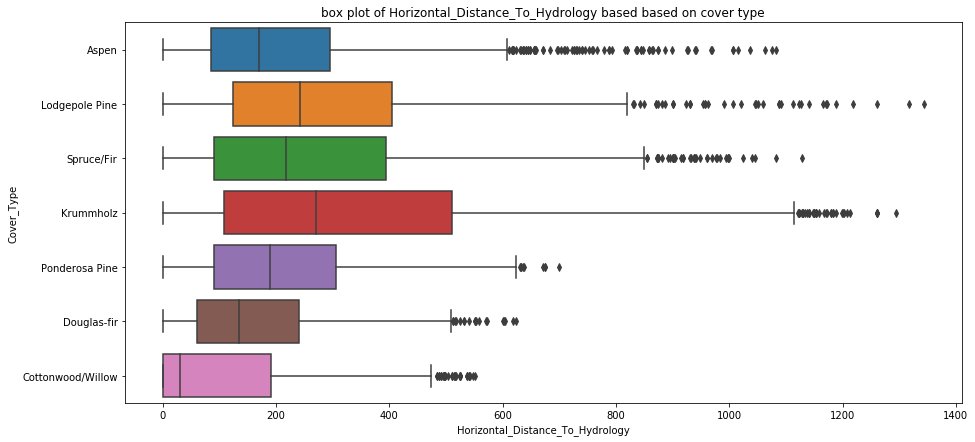

In [69]:
make_distplot('Horizontal_Distance_To_Hydrology')
plt.title('Horizontal_Distance_To_Hydrology based on cover type')
plt.figure(figsize=(15,7))
sns.boxplot(x='Horizontal_Distance_To_Hydrology',y='Cover_Type',data=df)
plt.title('box plot of Horizontal_Distance_To_Hydrology based based on cover type')
plt.show()

**Analysis based on horizontal distance to hyrdology**

**cottonwood**: distance to hydrology is very less for. <br/>
**Krummholz** : have widest range of distribution so hight std deviation. <br/>
**Aspen**: it has many outliers.


## Vertical Distance To Hydrology

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


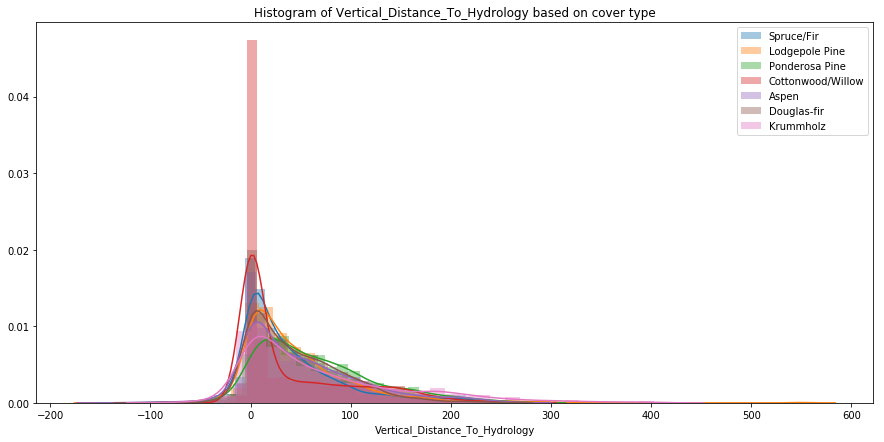

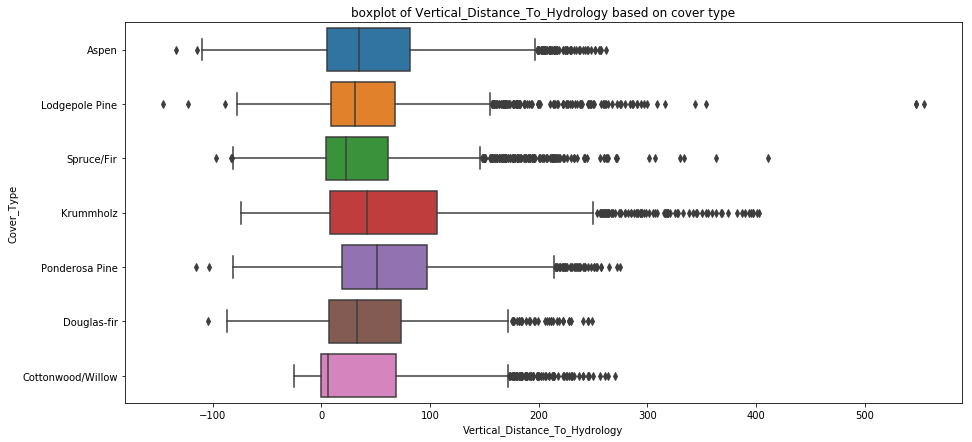

In [70]:
make_distplot('Vertical_Distance_To_Hydrology')
plt.title('Histogram of Vertical_Distance_To_Hydrology based on cover type')
plt.figure(figsize=(15,7))
sns.boxplot(x='Vertical_Distance_To_Hydrology',y='Cover_Type',data=df)
plt.title('boxplot of Vertical_Distance_To_Hydrology based on cover type')
plt.show()

**Analysis based on vertical distance to hyrdology**

almost all the Cover_type tend to have zero vertical distance to the hydrology

followed by some reasearch it seems negative vertical distance means underground water but then positive 
value sounds confusing. so not sure what are negative values for.

i am planning to convert negative values to positive and then make another column that says this is positive or 
negative

i am not sure wether this will help or not but i will give it a try

## relation between horizontal distance and vertical distance to hydrology

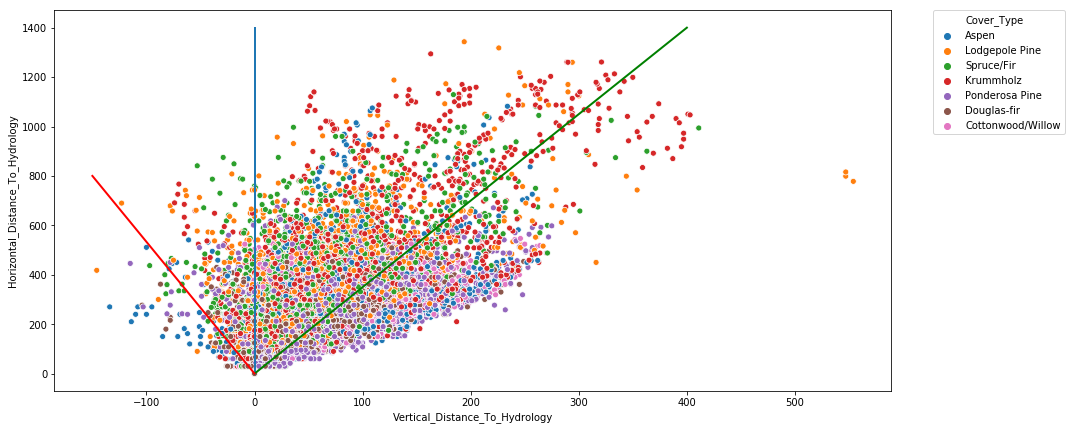

In [82]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='Vertical_Distance_To_Hydrology',y='Horizontal_Distance_To_Hydrology',data=df,hue='Cover_Type')
plt.plot([0,0],[0,1400],linewidth=2)
plt.plot([0,400],[0,1400],linewidth=2,color='green')
plt.plot([0,-150],[0,800],linewidth=2,color='red')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # making legend out of figure
plt.show()


there seems to be weak positive relation between the vertical and horizontal <br/>
as red line shows as vertical distance increase in negative direction horizontal distance will also increase <br/>
and as green line increased in positive direction horizontal distance increases <br/>
so it will be good to convert  all negative vetrical distance to positive and add an indicator

## Horizontal distance to roadways

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


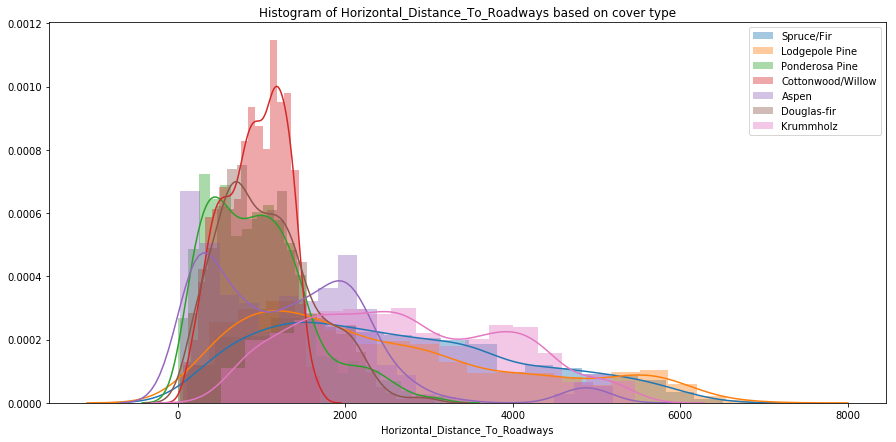

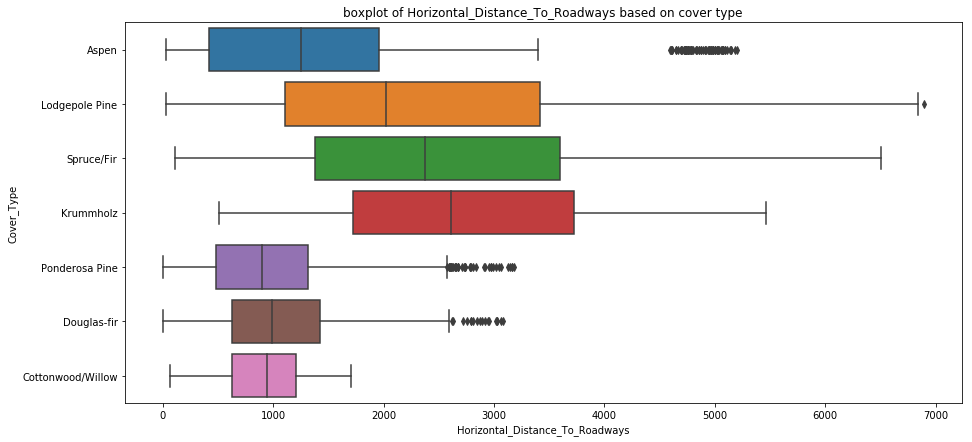

In [83]:
make_distplot('Horizontal_Distance_To_Roadways')
plt.title('Histogram of Horizontal_Distance_To_Roadways based on cover type')
plt.figure(figsize=(15,7))
sns.boxplot(x='Horizontal_Distance_To_Roadways',y='Cover_Type',data=df)
plt.title('boxplot of Horizontal_Distance_To_Roadways based on cover type')
plt.show()

**Analysis based on Horizontal_Distance_To_Roadways**

**Cottonwood/Willow**: are found in range of 0 to 2000 means near to roadways <br/>
**Douglas-fir** and **ponderosa Pinne** are also found near roadways but it seems that they are also found on
awas from roadways <br/>
**Krummholz**: I think they are mostly found away from roadways so they do not like disturbance. <br/>
**Aspen**: they is good balance in distance but as always ther are huge outliers in Aspen. <br/>
**Lodge Pine** and **Spruce/Fin** : it dosen't seem to care about its distance to roadways but ther more quantity towards roadways
 and number gradually decreases moving away from road.
 

In [84]:
df.head(2)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,direction
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Aspen,NE
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Aspen,NE


## horizontal distance to firepoints

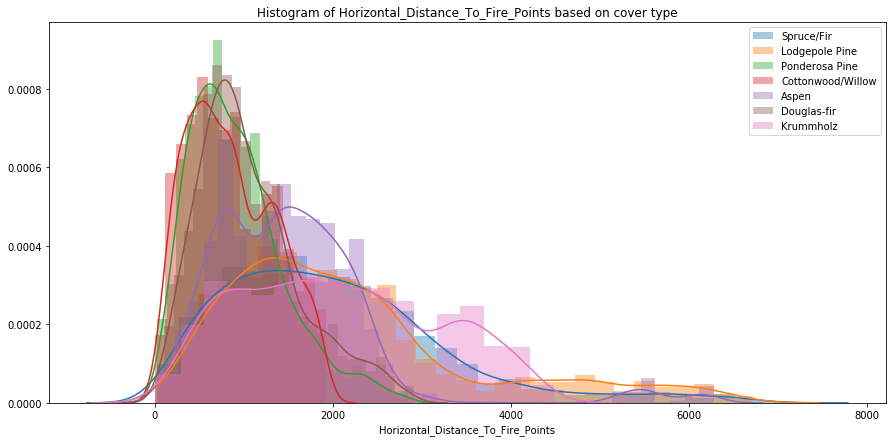

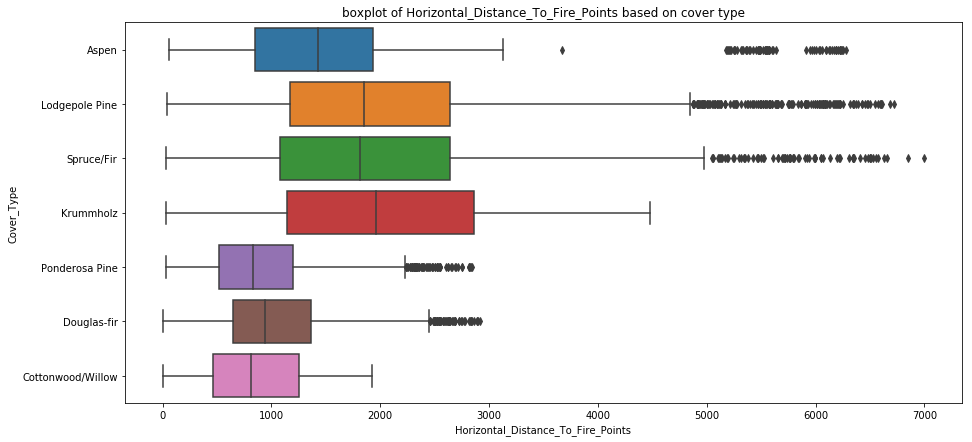

In [85]:
make_distplot('Horizontal_Distance_To_Fire_Points')
plt.title('Histogram of Horizontal_Distance_To_Fire_Points based on cover type')
plt.figure(figsize=(15,7))
sns.boxplot(x='Horizontal_Distance_To_Fire_Points',y='Cover_Type',data=df)
plt.title('boxplot of Horizontal_Distance_To_Fire_Points based on cover type')
plt.show()

**Analysis based on Horizontal_Distance_To_Fire_Points**

**Cottonwood/Willow**: are found near to fire point for some reason <br/>
**Douglas-fir** and **ponderosa Pinne** are also found near fire points  <br/>
**Krummholz**: They like to be away from fire. <br/>
**Aspen**: Aspen tree as always in middle and so many outliers. <br/>
**Lodge Pine** and **Spruce/Fin** : seems to be in the neither to far nor to near.
 
 Basic question arrives that why some Cover_Types are near to the Fire points than
 Other as fire destroyes the plants.
 
 But i have read some plants need fire to spread their seeds or you can say grain but not sure <br/>
 that this list includes any of that plants.

## Hill shades

There are three types of Hill shades based on time.<br/>
**Hillshade_9am**<br/>
**Hillshade_Noon**<br/>
**Hillshade_3pm**

All three ranges from index 0 to 255 like intensity of colors in computer.

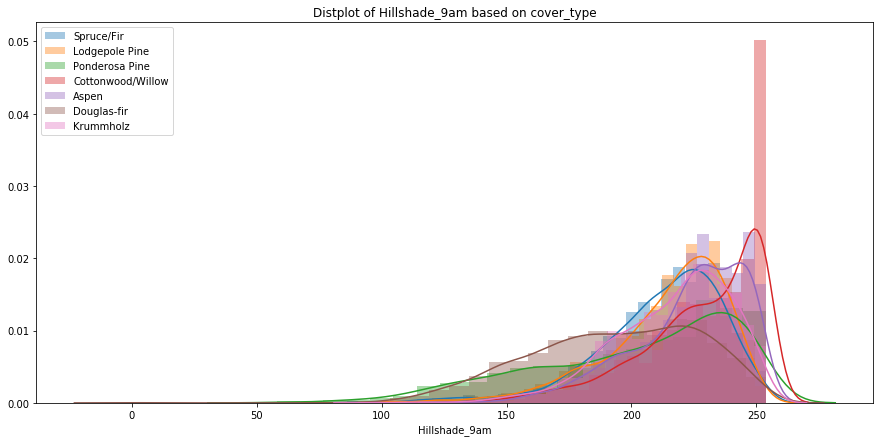

In [90]:
make_distplot("Hillshade_9am")
plt.title("Distplot of Hillshade_9am based on cover_type")
plt.show()

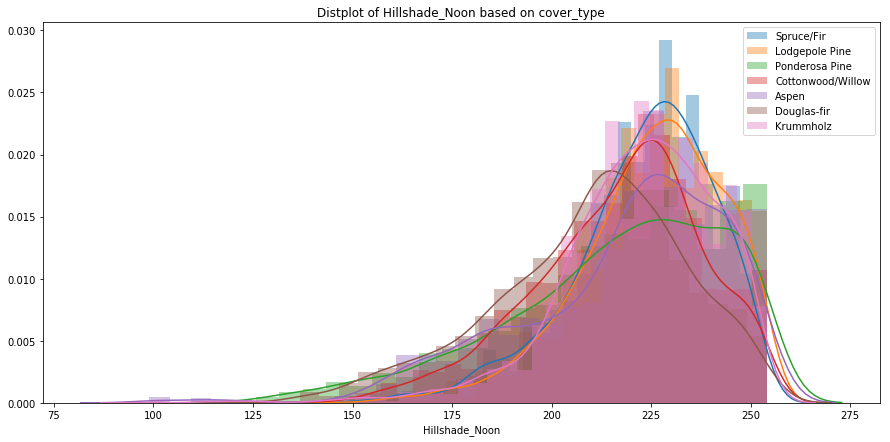

In [91]:
make_distplot("Hillshade_Noon")
plt.title("Distplot of Hillshade_Noon based on cover_type")
plt.show()

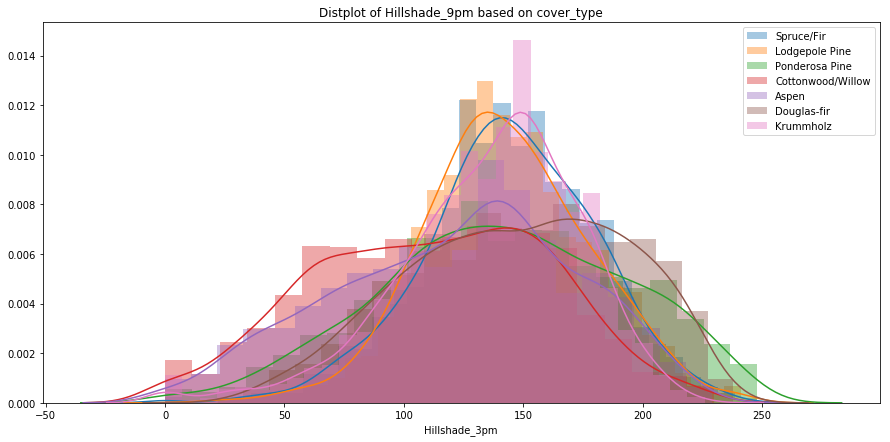

In [93]:
make_distplot("Hillshade_3pm")
plt.title("Distplot of Hillshade_9pm based on cover_type")
plt.show()

## wilderness 

There are four different types of wilderness area:

    Wilderness_area1: Rawah Wilderness Area
    Wilderness_area2: Neota Wilderness Area
    Wilderness_area3: Comanche Peak Wilderness Area
    Wilderness_area4: Cache la Poudre Wilderness Area


In [17]:
def set_wilderness(row):
    if row.Wilderness_Area1 == 1:
        return 'Rawah'
    elif row.Wilderness_Area2 == 1:
        return 'Neota'
    elif row.Wilderness_Area3 == 1:
        return 'Comanche Peak'
    elif row.Wilderness_Area4 == 1:
        return 'Cache la Poudre'
    else:
        return 0

In [18]:
df['Wilderness'] = df.apply(set_wilderness,axis=1)

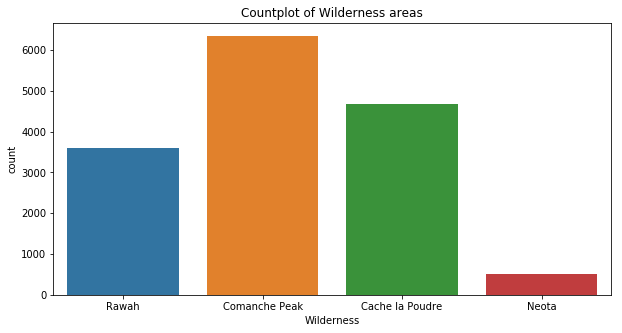

In [101]:
plt.figure(figsize=(10,5))
plt.title("Countplot of Wilderness areas")
sns.countplot(x = df.Wilderness)
plt.show()

## Barplot of wilderness based on cover type

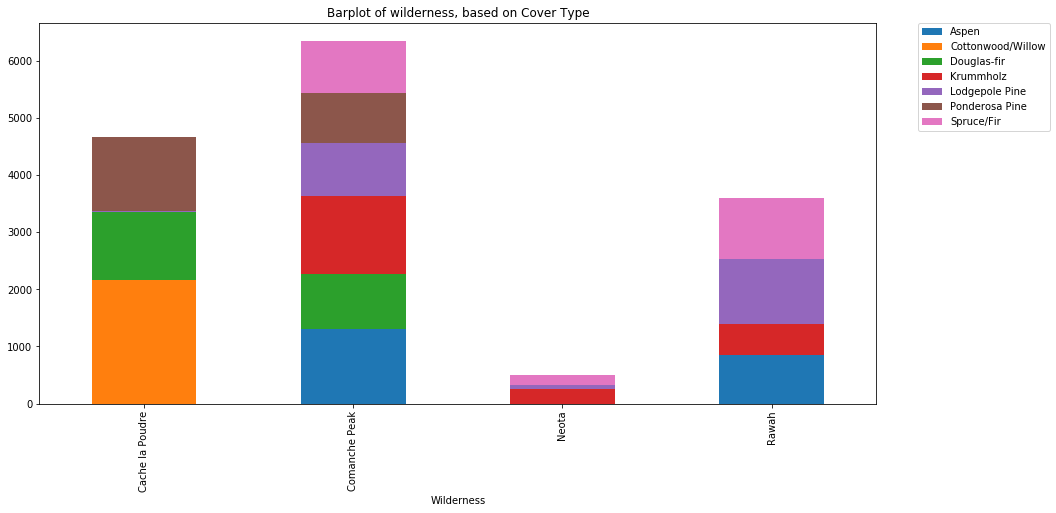

In [103]:
df_plot = df.groupby(['Cover_Type', 'Wilderness']).size().reset_index().pivot(columns='Cover_Type', index='Wilderness', values=0)
df_plot.plot(kind='bar', stacked=True,figsize=(15,7))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Barplot of wilderness, based on Cover Type")
plt.show()

## Soil Types 
 
There are 40 types of soil types 

Soil_Types1 to Soil_Types40

In [159]:
def set_soiltype(row):
    for i in range(1,40):
        if row['Soil_Type'+str(i)] == 1:
            return i

In [160]:
df['SoilType'] = df.apply(set_soiltype,axis=1)


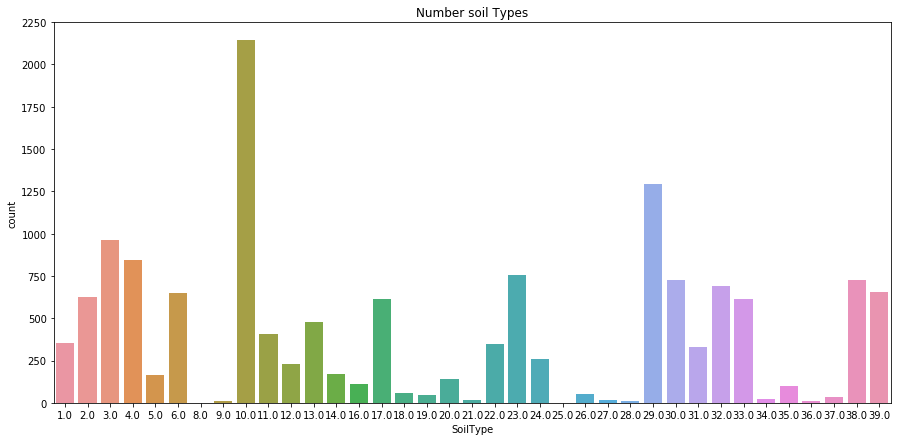

In [117]:
plt.figure(figsize=(15,7))
plt.title("Number soil Types")
sns.countplot(df["SoilType"])
plt.show()

## Barplot of soiltype based on covertype

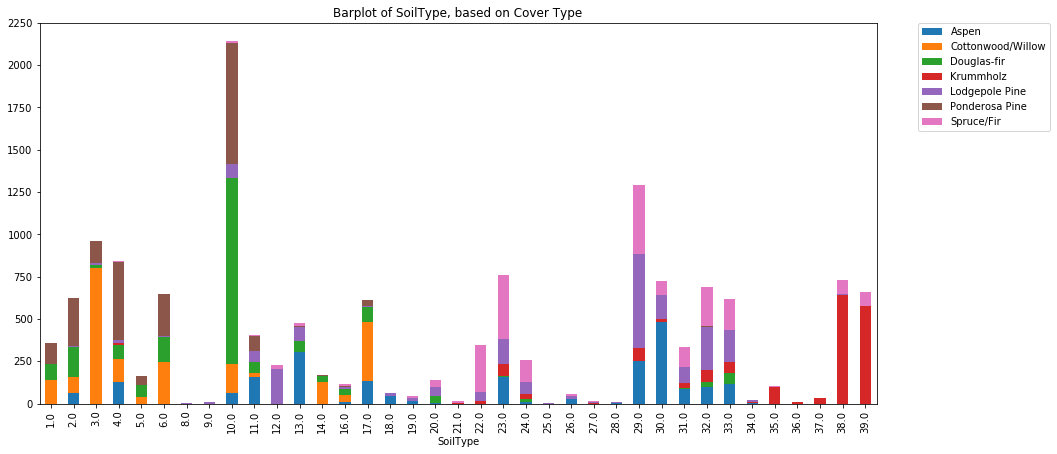

In [120]:
df_plot = df.groupby(['Cover_Type', 'SoilType']).size().reset_index().pivot(columns='Cover_Type', index='SoilType', values=0)
df_plot.plot(kind='bar', stacked=True,figsize=(15,7))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Barplot of SoilType, based on Cover Type")
plt.show()

## summary

most of the data is clean and has no problem with it.<br/>
Aspen have some outliers but i am not thinking of removing it.

But main thing I observed after building some models in another notebook that 

Cover_Type1 and Cover_Type2 are difficult to seperate some times which can  also be observed in data.

And RandomForest is found to give better result than other algorithm

## selecting kbest features from  data

In [47]:
from sklearn.feature_selection import SelectKBest , f_classif

In [55]:
bestfeatures = SelectKBest(score_func= f_classif,k=10)
fit = bestfeatures.fit(X,y)
dfscore = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data.columns)
featurescores = pd.concat([dfcolumns,dfscore],axis=1)
featurescores.columns = ['feature','score']
print(featurescores.nlargest(40,'score'))

                               feature         score
0                            Elevation  16241.233317
13                    Wilderness_Area4   5072.497908
5      Horizontal_Distance_To_Roadways   1223.070458
23                         Soil_Type10    977.737621
16                          Soil_Type3    929.217593
10                    Wilderness_Area1    928.831132
9   Horizontal_Distance_To_Fire_Points    746.124576
51                         Soil_Type38    744.906554
52                         Soil_Type39    640.529899
12                    Wilderness_Area3    444.959975
53                         Soil_Type40    422.043458
6                        Hillshade_9am    378.220751
3     Horizontal_Distance_To_Hydrology    375.897228
43                         Soil_Type30    352.446574
42                         Soil_Type29    341.825668
2                                Slope    301.849051
17                          Soil_Type4    248.325587
35                         Soil_Type22    233.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [20 28] are constant.
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


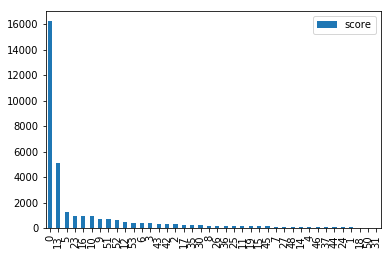

In [78]:
featurescores.nlargest(40,'score').plot(kind='bar',orientation='vertical')

## applying Forward Selection on kbest features

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import scikitplot

In [80]:
classifier = RandomForestClassifier(n_estimators=100,criterion='entropy')

In [22]:
def evaluate_confusion_matrix(cf_matrix,ytest,ypred):
    scikitplot.metrics.plot_confusion_matrix(ytest,ypred)
    rows, columns = cf_matrix.shape
    t = 0
    f = 0
    for i in range(rows):
        for j in range(columns):
            if i == j:
                t = t + cf_matrix[i][j]
            else:          
                f = f + cf_matrix[i][j]
    total = t + f      
            
    print("number of correct predection: " + str(t)+ "/" +str(total)) 
    print("number of incorrect prediction are: " + str(f) + "/" + str(total))
           

In [61]:
list_of_features = list()
for i in featurescores.nlargest(40,'score')['feature']:
    list_of_features.append(i)
    classifier.fit(X_train[list_of_features],y_train)
    y_pred = classifier.predict(X_test[list_of_features])
    cf_matrix = confusion_matrix(y_test,y_pred)
    print("list of feature",list_of_features)
    evaluate_confusion_matrix(cf_matrix,y_test,y_pred)
    
    

list of feature ['Elevation']
number of correct predection: 1605/3024
number of incorrect prediction are: 1419/3024
list of feature ['Elevation', 'Wilderness_Area4']
number of correct predection: 1605/3024
number of incorrect prediction are: 1419/3024
list of feature ['Elevation', 'Wilderness_Area4', 'Horizontal_Distance_To_Roadways']
number of correct predection: 1831/3024
number of incorrect prediction are: 1193/3024
list of feature ['Elevation', 'Wilderness_Area4', 'Horizontal_Distance_To_Roadways', 'Soil_Type10']
number of correct predection: 1944/3024
number of incorrect prediction are: 1080/3024
list of feature ['Elevation', 'Wilderness_Area4', 'Horizontal_Distance_To_Roadways', 'Soil_Type10', 'Soil_Type3']
number of correct predection: 1986/3024
number of incorrect prediction are: 1038/3024
list of feature ['Elevation', 'Wilderness_Area4', 'Horizontal_Distance_To_Roadways', 'Soil_Type10', 'Soil_Type3', 'Wilderness_Area1']
number of correct predection: 2075/3024
number of incorre

list of feature ['Elevation', 'Wilderness_Area4', 'Horizontal_Distance_To_Roadways', 'Soil_Type10', 'Soil_Type3', 'Wilderness_Area1', 'Horizontal_Distance_To_Fire_Points', 'Soil_Type38', 'Soil_Type39', 'Wilderness_Area3', 'Soil_Type40', 'Hillshade_9am', 'Horizontal_Distance_To_Hydrology', 'Soil_Type30', 'Soil_Type29', 'Slope', 'Soil_Type4', 'Soil_Type22', 'Soil_Type17', 'Hillshade_3pm', 'Soil_Type13', 'Soil_Type23', 'Soil_Type12', 'Wilderness_Area2', 'Soil_Type6']
number of correct predection: 2606/3024
number of incorrect prediction are: 418/3024
list of feature ['Elevation', 'Wilderness_Area4', 'Horizontal_Distance_To_Roadways', 'Soil_Type10', 'Soil_Type3', 'Wilderness_Area1', 'Horizontal_Distance_To_Fire_Points', 'Soil_Type38', 'Soil_Type39', 'Wilderness_Area3', 'Soil_Type40', 'Hillshade_9am', 'Horizontal_Distance_To_Hydrology', 'Soil_Type30', 'Soil_Type29', 'Slope', 'Soil_Type4', 'Soil_Type22', 'Soil_Type17', 'Hillshade_3pm', 'Soil_Type13', 'Soil_Type23', 'Soil_Type12', 'Wilderness

list of feature ['Elevation', 'Wilderness_Area4', 'Horizontal_Distance_To_Roadways', 'Soil_Type10', 'Soil_Type3', 'Wilderness_Area1', 'Horizontal_Distance_To_Fire_Points', 'Soil_Type38', 'Soil_Type39', 'Wilderness_Area3', 'Soil_Type40', 'Hillshade_9am', 'Horizontal_Distance_To_Hydrology', 'Soil_Type30', 'Soil_Type29', 'Slope', 'Soil_Type4', 'Soil_Type22', 'Soil_Type17', 'Hillshade_3pm', 'Soil_Type13', 'Soil_Type23', 'Soil_Type12', 'Wilderness_Area2', 'Soil_Type6', 'Soil_Type2', 'Soil_Type32', 'Hillshade_Noon', 'Soil_Type14', 'Soil_Type35', 'Soil_Type1', 'Vertical_Distance_To_Hydrology', 'Soil_Type33', 'Soil_Type24', 'Soil_Type31', 'Soil_Type11', 'Aspect', 'Soil_Type5']
number of correct predection: 2613/3024
number of incorrect prediction are: 411/3024
list of feature ['Elevation', 'Wilderness_Area4', 'Horizontal_Distance_To_Roadways', 'Soil_Type10', 'Soil_Type3', 'Wilderness_Area1', 'Horizontal_Distance_To_Fire_Points', 'Soil_Type38', 'Soil_Type39', 'Wilderness_Area3', 'Soil_Type40', 

In [23]:
best_list_of_features = ['Elevation', 'Wilderness_Area4', 'Horizontal_Distance_To_Roadways', 'Soil_Type10', 'Soil_Type3', 'Wilderness_Area1', 'Horizontal_Distance_To_Fire_Points', 'Soil_Type38', 'Soil_Type39', 'Wilderness_Area3', 'Soil_Type40', 'Hillshade_9am', 'Horizontal_Distance_To_Hydrology', 'Soil_Type30', 'Soil_Type29', 'Slope', 'Soil_Type4', 'Soil_Type22', 'Soil_Type17', 'Hillshade_3pm', 'Soil_Type13', 'Soil_Type23', 'Soil_Type12', 'Wilderness_Area2', 'Soil_Type6', 'Soil_Type2', 'Soil_Type32', 'Hillshade_Noon', 'Soil_Type14', 'Soil_Type35', 'Soil_Type1', 'Vertical_Distance_To_Hydrology', 'Soil_Type33', 'Soil_Type24', 'Soil_Type31', 'Soil_Type11']

## Applying forward selection on every feature

In [173]:
list_of_features = list()
for i in X_train.columns:
    list_of_features.append(i)
    classifier.fit(X_train[list_of_features],y_train)
    y_pred = classifier.predict(X_test[list_of_features])
    cf_matrix = confusion_matrix(y_test,y_pred)
    print("list of feature",list_of_features)
    evaluate_confusion_matrix(cf_matrix,y_test,y_pred)

NameError: name 'classifier' is not defined

In [24]:
bad_features = ['Hillshade_9am','Hillshade_3pm','Wilderness_Area4','Soil_Type12','Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17', 'Soil_Type21','Soil_Type26','Soil_Type29','Soil_Type39']
best_list_of_features2 = list(set(X_train.columns) - set(bad_features))

In [42]:
bad_features2 = ['Soil_Type7','Soil_Type18','Soil_Type9','Soil_Type8','Soil_Type37','Soil_Type19'] 
best_list_of_feature3 = list(set(best_list_of_features2)-set(bad_features2))
# len(best_list_of_feature3)
# 8,9,21,25,27,28,34,18,19,26,37,7,15

## corelation matrix

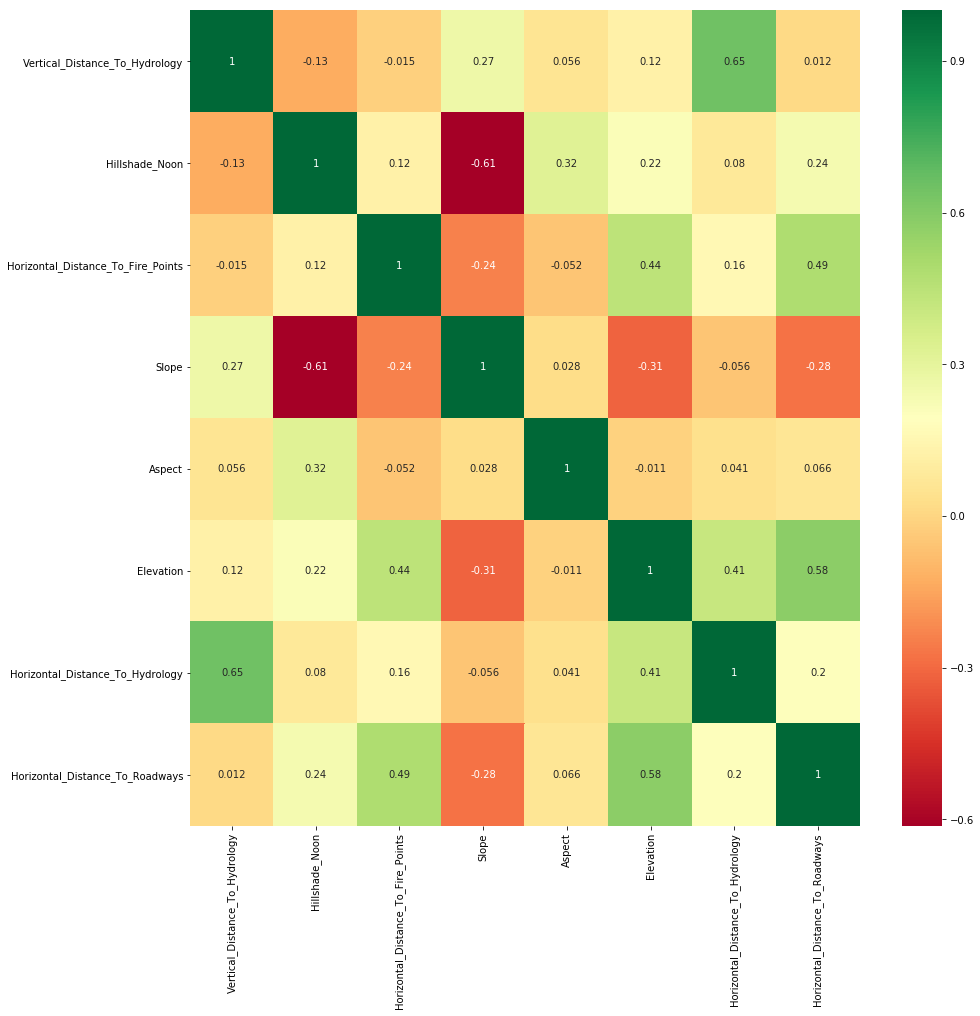

In [197]:
plt.figure(figsize=(15,15))
sns.heatmap(data[[x for x in best_list_of_feature3 if x in non_categorical_columns]].corr(),annot=True,cmap="RdYlGn")

In [124]:
# for i in best_list_final:
#     best_list_of_feature3.append(i)
#     classifier.fit(X_train[best_list_of_feature3],y_train)
#     y_pred = classifier.predict(X_test[best_list_of_feature3])
#     cf_matrix = confusion_matrix(y_test,y_pred)
#     print("list of feature",best_list_of_feature3)
#     best_list_of_feature3.remove(i)
#     evaluate_confusion_matrix(cf_matrix,y_test,y_pred)

## Testing different things

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train[non_categorical_columns])
X_test_std = scaler.transform(X_test[non_categorical_columns])

X_train_plus = pd.concat([pd.DataFrame(X_train_std,index=X_train.index,columns=non_categorical_columns),X_train[categorical_columns_2]],axis=1)
X_test_plus = pd.concat([pd.DataFrame(X_test_std,index=X_test.index,columns=non_categorical_columns),X_test[categorical_columns_2]],axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [27]:
X_train2 = X_train.copy()
X_train2.columns = X_train.columns
X_test2 = X_test.copy()
X_test2.columns = X_test.columns

X_train2['direction'] = X_train2.apply(group_aspect,axis=1)
X_test2['direction'] = X_test2.apply(group_aspect,axis=1)

X_train2["vertical_indicator"] = np.nan
X_test2["vertical_indicator"] = np.nan

def make_positive(row):
    if row['Vertical_Distance_To_Hydrology'] <= 0:
        return row['Vertical_Distance_To_Hydrology'] * -1
    else:
        return row['Vertical_Distance_To_Hydrology']
    
def add_indicator(row):
    if row['Vertical_Distance_To_Hydrology'] <= 0:
        return int(1)
    else:
        return int(0)
X_train2['vertical_indicator'] = X_train2.apply(add_indicator,axis=1)
X_test2['vertical_indicator'] = X_test2.apply(add_indicator,axis=1)

X_train2['Vertical_Distance_To_Hydrology'] = X_train2.apply(make_positive,axis=1)
X_test2['Vertical_Distance_To_Hydrology'] = X_test2.apply(make_positive,axis=1)
X_train2 = pd.get_dummies(X_train2)
X_test2 = pd.get_dummies(X_test2)

In [28]:
# X_train2.columns

In [67]:
classifier_test = RandomForestClassifier(n_estimators=719,max_depth=464,max_features=0.3,min_samples_leaf=1,min_samples_split=2,bootstrap=False)
classifier_test.fit(X_train[best_list_of_feature3],y_train)
y_pred = classifier_test.predict(X_test[best_list_of_feature3])


number of correct predection: 2672/3024
number of incorrect prediction are: 352/3024


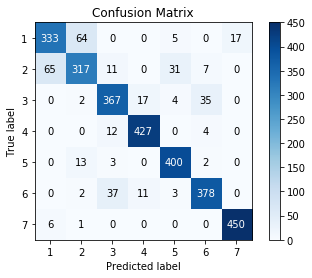

In [68]:
cf_matrix = confusion_matrix(y_test,y_pred)
evaluate_confusion_matrix(cf_matrix,y_test,y_pred)

In [44]:
all_bad_features = list(set(X_train.columns) - set(best_list_of_feature3))
best_list_of_feature_test = best_list_of_feature3.copy()


In [69]:
all_bad_features

['Soil_Type19',
 'Soil_Type12',
 'Soil_Type17',
 'Soil_Type21',
 'Soil_Type26',
 'Soil_Type14',
 'Hillshade_9am',
 'Soil_Type16',
 'Soil_Type18',
 'Hillshade_3pm',
 'Soil_Type7',
 'Wilderness_Area4',
 'Soil_Type8',
 'Soil_Type15',
 'Soil_Type37',
 'Soil_Type9',
 'Soil_Type39',
 'Soil_Type29']

In [86]:
best_list_of_feature_test.append("Soil_Type12")


In [85]:
best_list_of_feature_test.remove("Soil_Type26")

In [87]:
classifier_test.fit(X_train[y_train.isin([1,2])][best_list_of_feature_test],y_train[y_train.isin([1,2])])
y_pred = classifier_test.predict(X_test[y_test.isin([1,2])][best_list_of_feature_test])

number of correct predection: 698/850
number of incorrect prediction are: 152/850


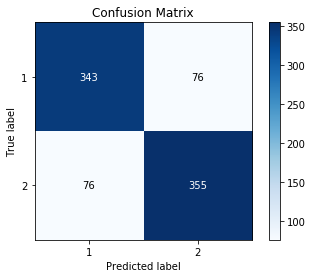

In [88]:
cf_matrix = confusion_matrix(y_test[y_test.isin([1,2])],y_pred)
evaluate_confusion_matrix(cf_matrix,y_test[y_test.isin([1,2])],y_pred)

In [151]:
classifier2 = RandomForestClassifier(n_estimators=1000,criterion='entropy')
classifier2.fit(X[best_list_of_feature3],y)
y_pred = classifier2.predict(X_test[best_list_of_feature3])
cf_matrix = confusion_matrix(y_test,y_pred)
evaluate_confusion_matrix(cf_matrix,y_test,y_pred)

number of correct predection: 3024/3024
number of incorrect prediction are: 0/3024


In [91]:
test_data = pd.read_csv("forest_test.csv")

In [92]:
test_data_drop = test_data.drop("Id",axis=1)

In [154]:
test_pred = classifier2.predict(test_data_drop[best_list_of_feature3])

In [155]:
submission = pd.DataFrame({"Id":test_data.Id,"Cover_Type":test_pred})
submission.to_csv("submission3.csv",index=False)

## Tuning RandomForest

In [165]:
# from pprint import pprint

In [166]:
# rf = RandomForestClassifier()
# pprint(rf.get_params())

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [177]:
# n_estimators = [int(x) for x in np.linspace(200,2000,num=10)]
# max_features = ['auto','sqrt']
# max_depth = [int(x) for x in np.linspace(10,110,11)]
# max_depth.append(None)
# min_samples_split = [2,5,10]
# min_samples_leaf = [1, 2, 4]
# bootstrap = [True, False]

In [178]:
# random_grid = {
#     'n_estimators': n_estimators,
#     'max_features': max_features,
#     'max_depth': max_depth,
#     'min_samples_split': min_samples_split,
#     'min_samples_leaf': min_samples_leaf,
#     'bootstrap': bootstrap
# }

In [179]:
# pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [180]:
# from sklearn.model_selection import RandomizedSearchCV

In [182]:
# estimator = RandomizedSearchCV(estimator = rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,n_jobs=-1)

In [183]:
# estimator.fit(X_train[best_list_of_feature3],y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 58.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [184]:
pprint(estimator.best_params_)

{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}


In [89]:
classifier_best = RandomForestClassifier(n_estimators=719,max_depth=464,max_features=0.3,min_samples_leaf=1,min_samples_split=2,bootstrap=False)

In [201]:
classifier_best.fit(X_train[best_list_of_feature3],y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=40, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

number of correct predection: 2663/3024
number of incorrect prediction are: 361/3024


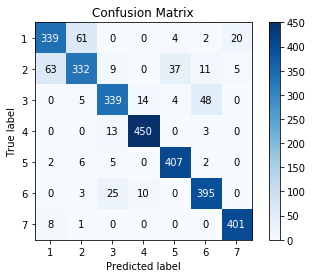

In [187]:
y_pred = classifier_best.predict(X_test[best_list_of_feature3])
cf_matrix = confusion_matrix(y_test,y_pred)
evaluate_confusion_matrix(cf_matrix,y_test,y_pred)

In [90]:
classifier_best.fit(X[best_list_of_feature3],y)


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=464, max_features=0.3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=719, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [93]:
test_pred = classifier_best.predict(test_data[best_list_of_feature3])


In [94]:
submission = pd.DataFrame({"Id":test_data.Id,"Cover_Type":test_pred})
submission.to_csv("submission6.csv",index=False)

## StackCVCclassifier

In [95]:
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [99]:
from mlxtend.classifier import StackingCVClassifier
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier

In [100]:
classifier_rf = RandomForestClassifier(n_estimators = 719,
                                       max_features = 0.3,
                                       max_depth = 464,
                                       min_samples_split = 2,
                                       min_samples_leaf = 1,
                                       bootstrap = False,
                                       random_state=42)

classifier_xgb = OneVsRestClassifier(XGBClassifier(n_estimators = 719,
                                                   max_depth = 464,
                                                   random_state=42))

classifier_et = ExtraTreesClassifier(random_state=42)

classifier_adb = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42)
classifier_bg = BaggingClassifier(random_state=42)

In [101]:
clf_list = [classifier_rf,classifier_xgb,classifier_et,classifier_adb,classifier_bg]

In [127]:
from sklearn.pipeline import make_pipeline
from mlxtend.feature_selection import ColumnSelector
pipe_rf = make_pipeline(ColumnSelector(cols=(0, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53)),
                        classifier_rf)
pipe_xgb = make_pipeline(ColumnSelector(cols=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 51, 52)),
                         classifier_xgb)
pipe_et = make_pipeline(ColumnSelector(cols=(0, 1, 3, 5, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53)),
                        classifier_et)
pipe_adb = make_pipeline(ColumnSelector(cols=(0, 1, 3, 5, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 22, 23, 24, 26, 27, 28, 29, 30, 31, 33, 34, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 50, 51, 52, 53)),
                        classifier_adb)
pipe_bg = make_pipeline(ColumnSelector(cols=(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53)),
                        classifier_bg)

In [128]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sclf = StackingCVClassifier(classifiers=[pipe_rf,pipe_xgb,pipe_et,pipe_adb,pipe_bg],
                            use_probas=True,
                            meta_classifier=classifier_rf)

In [129]:
labels = ['Random Forest', 'XGBoost', 'ExtraTrees', 'AdaBoost', 'Bagging', 'MetaClassifier']

In [105]:
for clf, label in zip([classifier_rf, classifier_xgb, classifier_et, classifier_adb, classifier_bg, sclf], labels):
    scores = cross_val_score(clf, X_train[best_list_of_feature3].values, y_train.values.ravel(),
                             cv=5,
                             scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.87 (+/- 0.01) [Random Forest]
Accuracy: 0.87 (+/- 0.01) [XGBoost]
Accuracy: 0.84 (+/- 0.01) [ExtraTrees]
Accuracy: 0.77 (+/- 0.01) [AdaBoost]
Accuracy: 0.83 (+/- 0.00) [Bagging]
Accuracy: 0.87 (+/- 0.01) [MetaClassifier]


In [131]:
sclf.fit(X_train.values,y_train.values.ravel())

StackingCVClassifier(classifiers=[Pipeline(memory=None,
     steps=[('columnselector', ColumnSelector(cols=(0, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53),
        drop_axis=Fals...imators=10, n_jobs=None, oob_score=False, random_state=42,
         verbose=0, warm_start=False))])],
           cv=2, drop_last_proba=False,
           meta_classifier=RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=464, max_features=0.3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=719, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
           n_jobs=None, pre_dispatch='2*n_jobs', random_state=None,
           shuffle=True, store

In [133]:
y_pred = sclf.predict(X_test.values)

number of correct predection: 2662/3024
number of incorrect prediction are: 362/3024


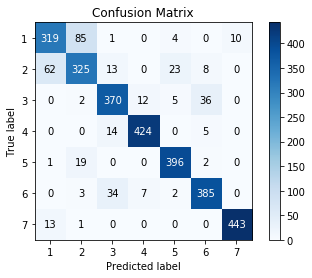

In [134]:
cf_matrix = confusion_matrix(y_test,y_pred)
evaluate_confusion_matrix(cf_matrix,y_test,y_pred)

In [138]:
score = accuracy_score(y_test,y_pred)
score

0.8802910052910053

In [135]:
sclf.fit(X.values,y.values.ravel())

StackingCVClassifier(classifiers=[Pipeline(memory=None,
     steps=[('columnselector', ColumnSelector(cols=(0, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53),
        drop_axis=Fals...imators=10, n_jobs=None, oob_score=False, random_state=42,
         verbose=0, warm_start=False))])],
           cv=2, drop_last_proba=False,
           meta_classifier=RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=464, max_features=0.3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=719, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
           n_jobs=None, pre_dispatch='2*n_jobs', random_state=None,
           shuffle=True, store

In [136]:
test_pred = classifier_best.predict(test_data[best_list_of_feature3])


In [137]:
submission = pd.DataFrame({"Id":test_data.Id,"Cover_Type":test_pred})
submission.to_csv("submission8.csv",index=False)